In [24]:
import os
from pathlib import Path
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

# 项目目录结构
BASE_DIR = Path("..").resolve().parent if (Path(".").name == "notebooks") else Path(".")
data_lr = BASE_DIR / "data" / "samples" / "LR"
data_hr = BASE_DIR / "data" / "samples" / "HR"
out_dir = BASE_DIR / "experiments" / "celeba_baseline_run1"
out_dir.mkdir(parents=True, exist_ok=True)

print("LR dir:", data_lr)
print("HR dir:", data_hr)
print("Output dir:", out_dir)


LR dir: data/samples/LR
HR dir: data/samples/HR
Output dir: experiments/celeba_baseline_run1


In [25]:
# 这是做 bicubic 的格

import os
from pathlib import Path
import cv2
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# 用和前面一样的根目录
BASE_DIR = Path.cwd().parent
data_lr = BASE_DIR / "data" / "samples" / "LR"
data_hr = BASE_DIR / "data" / "samples" / "HR"
out_dir = BASE_DIR / "experiments" / "celeba_baseline_run1"
out_dir.mkdir(parents=True, exist_ok=True)

results = []

for fname in os.listdir(data_lr):
    if not fname.lower().endswith((".jpg", ".png", ".jpeg")):
        continue

    lr_path = data_lr / fname
    hr_path = data_hr / fname

    if not hr_path.exists():
        print("No HR for", fname)
        continue

    lr = cv2.imread(str(lr_path))
    hr = cv2.imread(str(hr_path))

    # ✅ 这一行就是在做“bicubic 放大”
    h, w = lr.shape[:2]
    sr = cv2.resize(lr, (w * 2, h * 2), interpolation=cv2.INTER_CUBIC)
    #                        ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑
    #               这里的 INTER_CUBIC 就是 bicubic

    # 保存一下生成的图，方便看
    cv2.imwrite(str(out_dir / fname), sr)

    # 顺便算个指标
    psnr_val = psnr(hr, sr, data_range=255)
    ssim_val = ssim(hr, sr, channel_axis=2, data_range=255)
    results.append((fname, psnr_val, ssim_val))

print(f"Processed {len(results)} images.")


Processed 9 images.


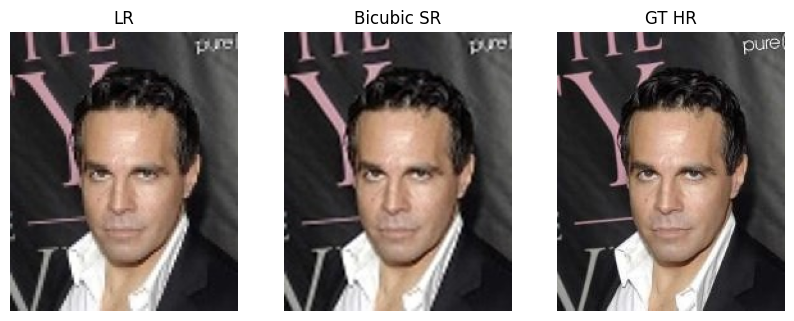

In [26]:
sample_name = results[0][0]
lr = cv2.imread(str(data_lr / sample_name))
hr = cv2.imread(str(data_hr / sample_name))
sr = cv2.imread(str(out_dir / sample_name))

# BGR → RGB
lr = cv2.cvtColor(lr, cv2.COLOR_BGR2RGB)
hr = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)
sr = cv2.cvtColor(sr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1); plt.imshow(lr); plt.title("LR"); plt.axis("off")
plt.subplot(1, 3, 2); plt.imshow(sr); plt.title("Bicubic SR"); plt.axis("off")
plt.subplot(1, 3, 3); plt.imshow(hr); plt.title("GT HR"); plt.axis("off")
plt.show()


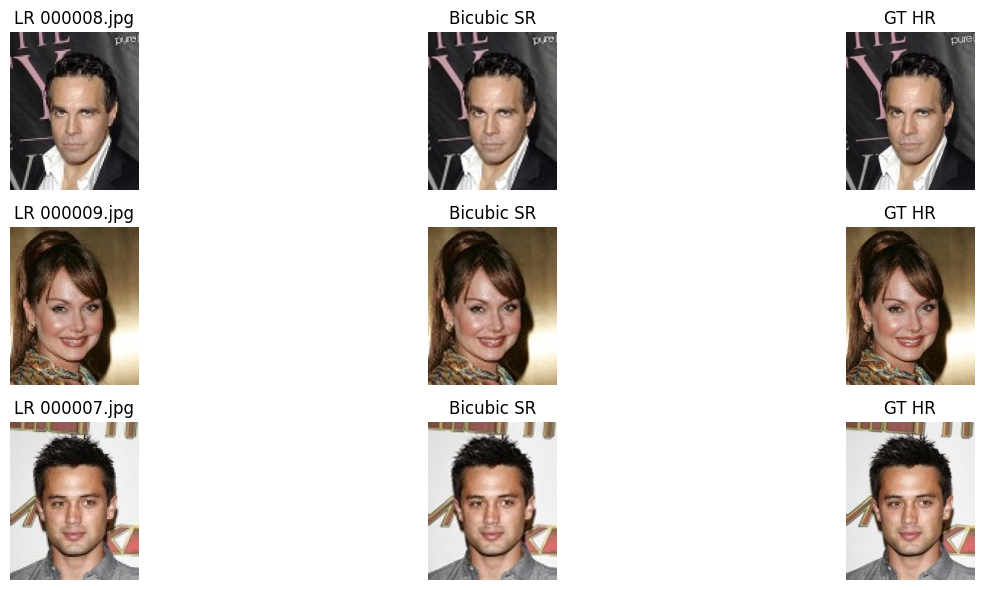

In [31]:
import matplotlib.pyplot as plt
import cv2

#show 5
n_show = min(3, len(results))

plt.figure(figsize=(15, 6))

for i in range(n_show):
    sample_name = results[i][0]

    lr = cv2.imread(str(data_lr / sample_name))
    hr = cv2.imread(str(data_hr / sample_name))
    sr = cv2.imread(str(out_dir / sample_name))

    lr = cv2.cvtColor(lr, cv2.COLOR_BGR2RGB)
    hr = cv2.cvtColor(hr, cv2.COLOR_BGR2RGB)
    sr = cv2.cvtColor(sr, cv2.COLOR_BGR2RGB)

    #
    plt.subplot(n_show, 3, 3*i + 1); plt.imshow(lr); plt.title(f"LR { sample_name}"); plt.axis("off")
    plt.subplot(n_show, 3, 3*i + 2); plt.imshow(sr); plt.title("Bicubic SR"); plt.axis("off")
    plt.subplot(n_show, 3, 3*i + 3); plt.imshow(hr); plt.title("GT HR"); plt.axis("off")


plt.tight_layout()
plt.show()




In [30]:
import numpy as np
psnr_mean = np.mean([p for _, p, _ in results])
ssim_mean = np.mean([s for _, _, s in results])
print(f"Mean PSNR: {psnr_mean:.2f}, Mean SSIM: {ssim_mean:.4f}")


Mean PSNR: 30.16, Mean SSIM: 0.9004
